**Based on the training data concerning Titanic passengers, I am creating a model to predict which of the passengers (from the test data file) survived the disaster.**

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression


In [2]:
train_data = pd.read_csv('/content/train.csv')
train_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Exploration and Preliminary Data Analysis and Visualization

In [3]:
train_data.shape

(891, 12)

In [4]:
train_data.duplicated().sum()

0

In [5]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

* SibSp - Number of Siblings/Spouses Aboard [1, 0, 3, 4, 2, 5, 8]
* Parch - Number of Parents/Children Aboard [0, 1, 2, 5, 3, 4, 6]
* Fare - Passenger Fare (British pound)
* Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton, nan)

In [8]:
train_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [40]:
df = train_data.copy()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [41]:
df = df.dropna(subset=['Age'])
train_data.shape

(891, 12)

### Data Preprocessing

Dropping unrelevant columns

In [17]:
df = df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare'], axis=1)

Data split to train and validation

In [18]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [19]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape,"\n")

X_train shape: (571, 6)
y_train shape: (571,) 



In [21]:
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape,"\n")

X_val shape: (143, 6)
y_val shape: (143,) 



###Standarization - get_dummies() of X_train and X_val

In [22]:
X_train = pd.get_dummies(X_train, columns=['Sex', 'Embarked'])
X_train.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
328,3,31.0,1,1,1,0,0,0,1
73,3,26.0,1,0,0,1,1,0,0
253,3,30.0,1,0,0,1,0,0,1
719,3,33.0,0,0,0,1,0,0,1
666,2,25.0,0,0,0,1,0,0,1


In [23]:
X_val = pd.get_dummies(X_val, columns=['Sex', 'Embarked'])
X_val.head()

,Pclass,Age,SibSp,Parch,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
149,2,42.0,0,0,0,1,0,0,1
407,2,3.0,1,1,0,1,0,0,1
53,2,29.0,1,0,1,0,0,0,1
369,1,24.0,0,0,1,0,1,0,0
818,3,43.0,0,0,0,1,0,0,1


###Heatmap of X_train correlation

Important features: Sex_female, Sex_male, Pclass

Other features don't seem to have much in common with survival.

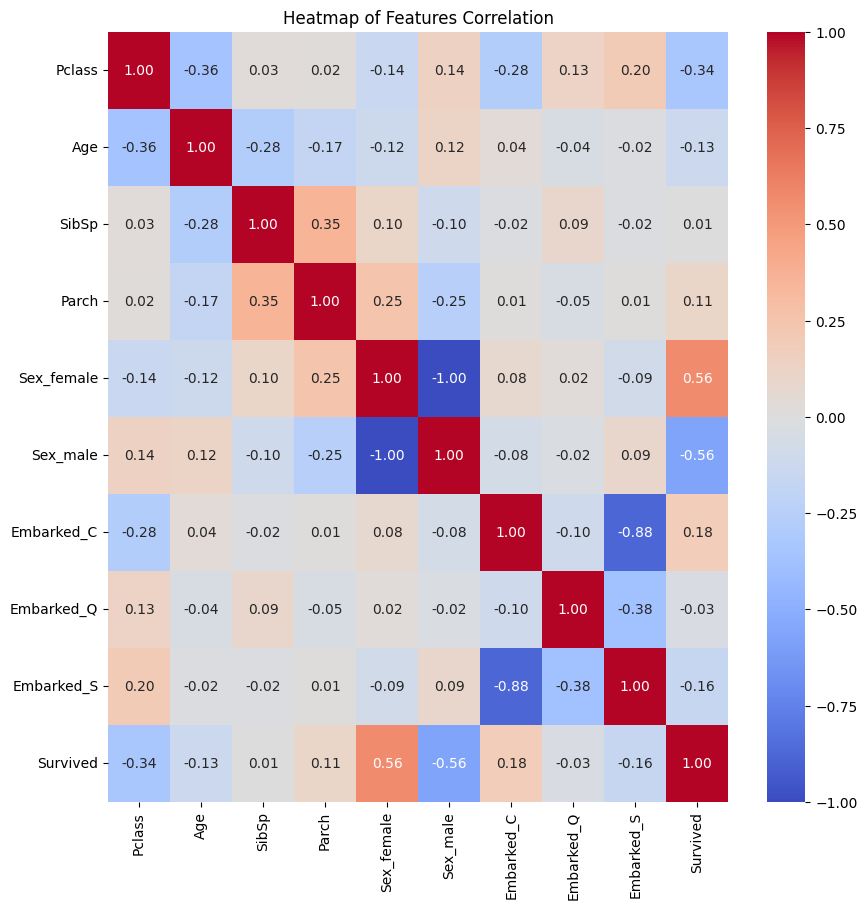

In [33]:
data_train = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(10, 10))
corr_matrix = data_train.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Heatmap of Features Correlation')
plt.show()

###Feature importance selection

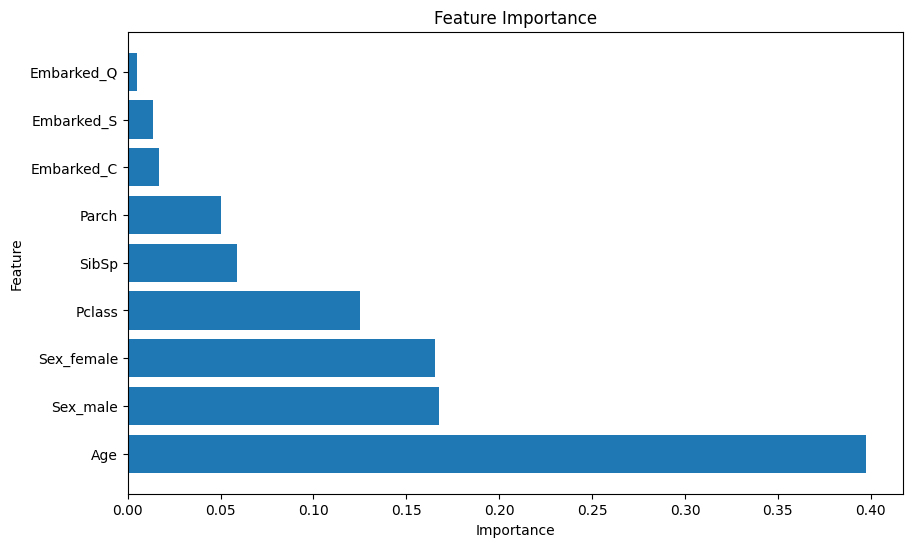

In [25]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

feature_importance = model.feature_importances_

importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6) ,)
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

###RandomForestClassifier

In [46]:
rfc_model = RandomForestClassifier()

In [47]:
params_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

grid_search = GridSearchCV(rfc_model, params_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}


In [54]:
rfc = RandomForestClassifier(n_estimators=50,
                            max_depth=20,
                            min_samples_split=2,
                            min_samples_leaf=2)

In [55]:
rfc_model.fit(X_train, y_train)
y_pred = rfc_model.predict(X_val)

In [56]:
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1:", f1)

Accuracy: 0.951048951048951
Precision: 0.9
Recall: 0.9818181818181818
F1: 0.9391304347826087
